# Import Data and Train Model


In [429]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.dataset import random_split
from torchvision.transforms import ToTensor, Lambda

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd;
import numpy as np
import math

from sklearn.model_selection import train_test_split

## Load Data: Create Dataset


### Load Absence Seizure Data


In [436]:
class AbsenceDataset(Dataset):
    def __init__(self, file_path, transform=None, target_transform=None):
        self.x, self.y = self.data_get(file_path)
        self.n_samples = len(self.x)

        self.transform = transform
        self.target_transform = target_transform

    def __getitem__(self, idx):
        sample_x, sample_y = self.x[idx], self.y[idx]

        if self.transform:
            sample_x = self.transform(sample_x)

        if self.target_transform:
            sample_y = self.target_transform(sample_y)

        return sample_x.float(), sample_y.float()

    def __len__(self):
        return self.n_samples

    def data_get(self, file_path):
        data = pd.read_csv(file_path)
        x_loaded, y_loaded = [], []
        for index, row in data.iterrows():
            x_loaded.append(np.load(row["data"]))
            y_loaded.append(np.load(row["labels"]))

        continuous_x = np.concatenate(x_loaded, axis=0)
        continuous_y = np.concatenate(y_loaded, axis=0)

        return continuous_x, continuous_y

In [442]:
# Split Data
dataset = AbsenceDataset(
    "processed_data/absence/epochs_files.csv",
    transform=torch.tensor,
    target_transform=torch.tensor,
)

if (int(len(dataset) * 0.7) + int(len(dataset) * 0.2) + int(len(dataset) * 0.1)) != len(
    dataset
):
    train_set, eval_set, test_set = random_split(
        dataset,
        [
            math.ceil(len(dataset) * 0.7),
            int(len(dataset) * 0.2),
            int(len(dataset) * 0.1),
        ],
    )
else:
    train_set, eval_set, test_set = random_split(
        dataset,
        [int(len(dataset) * 0.7), int(len(dataset) * 0.2), int(len(dataset) * 0.1)],
    )

In [443]:
len(dataset)

4141

In [444]:
train_dataloader = DataLoader(dataset=train_set, batch_size=5)
eval_dataloader = DataLoader(dataset=eval_set, batch_size=1, shuffle=True)
test_dataloader = DataLoader(dataset=test_set, batch_size=1, shuffle=True)

In [445]:
# # Dummy Training Loop
# n_e = 1
# samples = len(dataset)
# n_iter = math.ceil(samples / 4)

# for e in range(n_e):
#     for i, (inputs, labels) in enumerate(train_dataloader):
#         print((inputs.shape))
#         break

In [446]:
class AbnormalNeuralNetwork(nn.Module):
    def __init__(self, input_size=1000, output_size=1):
        super().__init__()
        self.CNN1 = nn.Conv1d(in_channels=5, out_channels=5, kernel_size=3)
        self.MaxPool1 = nn.MaxPool1d(kernel_size=5, stride=2)
        self.CNN2 = nn.Conv1d(in_channels=5, out_channels=5, kernel_size=3)
        self.MaxPool2 = nn.MaxPool1d(kernel_size=5, stride=2)
        self.CNN3 = nn.Conv1d(in_channels=5, out_channels=1, kernel_size=3)
        self.MaxPool3 = nn.MaxPool1d(kernel_size=5, stride=2)
        self.AvgPool1 = nn.AvgPool1d(kernel_size=5, stride=2)
        self.fc1 = nn.Linear(58, 1)

    def forward(self, x):
        out = self.CNN1(x)
        out = self.MaxPool1(out)
        out = self.CNN2(out)
        out = self.MaxPool2(out)
        out = self.CNN3(out)
        out = self.MaxPool3(out)
        out = self.AvgPool1(out)
        out = self.fc1(out)
        return out

In [447]:
model = AbnormalNeuralNetwork().to(device)

In [448]:
# Set optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
loss_function = nn.MSELoss()

In [451]:
epochs = 500  # Number of training iterations
losses = []  # Append loses to this list as training goes on

for i in range(epochs):
    print(f"Epoch: {i+1}")
    for i, (x_sample, y_sample) in enumerate(train_dataloader):
        # print(f"Batch: {i+1}")
        x, y = x_sample.to(device), y_sample.to(device)

        y_pred = model(x[0])
        loss = loss_function(y_pred, y)

        # Zero gradients, backward pass, update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    losses.append(loss.item())

Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50
Epoch: 51
Epoch: 52
Epoch: 53
Epoch: 54
Epoch: 55
Epoch: 56
Epoch: 57
Epoch: 58
Epoch: 59
Epoch: 60
Epoch: 61
Epoch: 62
Epoch: 63
Epoch: 64
Epoch: 65
Epoch: 66
Epoch: 67
Epoch: 68
Epoch: 69
Epoch: 70
Epoch: 71
Epoch: 72
Epoch: 73
Epoch: 74
Epoch: 75
Epoch: 76
Epoch: 77
Epoch: 78
Epoch: 79
Epoch: 80
Epoch: 81
Epoch: 82
Epoch: 83
Epoch: 84
Epoch: 85
Epoch: 86
Epoch: 87
Epoch: 88
Epoch: 89
Epoch: 90
Epoch: 91
Epoch: 92
Epoch: 93
Epoch: 94
Epoch: 95
Epoch: 96
Epoch: 97
Epoch: 98
Epoch: 99
Epoch: 100
Epoch: 1

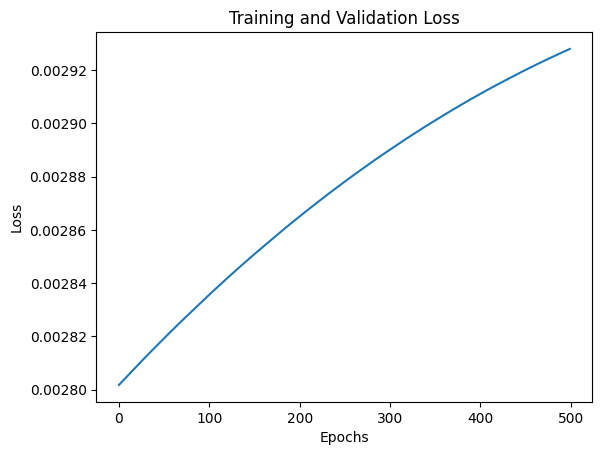

In [452]:
# Plot losses
plt.plot(range(0, epochs), losses, label="Training Loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.show()